In [4]:
%reload_kedro
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[01/02/24 13:07:13] INFO     Resolved project path as:                                              ]8;id=441996;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=306562;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/joelmashana/IRP/joel-mashana-dissertation-project.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/02/24 13:07:13] INFO     Kedro project Joel Mashana Dissertation Project                        ]8;id=198051;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=754830;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=235598;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=681209;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=350639;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=240152;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [5]:
data = catalog.load("buyer_payment_practices_filtered_encoded_final")
column_to_cluster = catalog.load("params:column_for_clustering")

[01/02/24 13:07:14] INFO     Loading data from 'buyer_payment_practices_filtered_encoded_final' ]8;id=62436;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=538910;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (CSVDataSet)...                                                                       

                    INFO     Loading data from 'params:column_for_clustering'                   ]8;id=512582;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=301651;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (MemoryDataset)...                                                                    

In [13]:
def find_optimal_clusters(data, column_to_cluster):
    feature = data[[column_to_cluster]]
    model = KMeans(random_state=0)

    visualiser = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
    visualiser.fit(feature)
    visualiser.show()  

    optimal_clusters = visualiser.elbow_value_

    print(f"Optimal number of clusters based on WCSS: {optimal_clusters}")

    return optimal_clusters


In [14]:
def perform_kmeans_clustering(data, column_to_cluster):
    optimal_number_of_clusters = find_optimal_clusters(data,  column_to_cluster)
    kmeans = KMeans(n_clusters=optimal_number_of_clusters, random_state=0)
    data['Clusters'] = kmeans.fit_predict(data[[column_to_cluster]])

    data['Risk Level'] = kmeans.labels_ + 1 
    data = data.drop(['Clusters', '% Invoices not paid within agreed terms'], axis=1)

    assert 'Risk Level' in data.columns, "Risk Level column does not exist."
    assert 'Clusters' not in data.columns, "Clusters column should not exist after dropping it."
    assert '% Invoices not paid within agreed terms' not in data.columns, "Error: '% Invoices not paid within agreed terms' column still exists in the dataset."

    assert data['Risk Level'].nunique() == optimal_number_of_clusters, (
        "The number of unique values in the Risk Level column is not equal to the optimal number of clusters."
    )
    return data

[01/02/24 13:10:49] WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=133340;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=165371;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=406729;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=843992;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=268060;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=31941;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=952151;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=617260;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

[01/02/24 13:10:50] WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=159981;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=601403;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=655420;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=475529;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=513803;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=263567;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=626692;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=988796;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

[01/02/24 13:10:51] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160540;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519141;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=139951;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=250912;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=507632;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=957913;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=408296;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166595;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=391870;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=22019;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=886822;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856452;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=339060;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623943;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=641444;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237299;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=433980;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766634;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=869012;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943640;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=88319;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801691;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=467709;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=3356;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=567994;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=617789;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=986169;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=938970;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950782;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=857829;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=759434;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=373516;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=575544;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610796;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=144038;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365367;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=232470;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=890757;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=640338;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410310;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=959191;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188633;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=85907;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118562;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=894428;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=653382;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814255;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741618;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=456294;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241526;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=94808;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=210902;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833555;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977460;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=30250;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50852;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=206972;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740816;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=973044;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222166;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=612946;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606002;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=950507;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754205;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=892912;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185835;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=417758;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83312;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=7887;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=713225;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402321;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634255;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=53714;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316633;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=438623;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992815;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=456944;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=734663;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=892858;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75480;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=90297;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57442;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=964203;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=73422;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=54969;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328127;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967674;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594193;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=826333;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=950159;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=140952;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623165;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823216;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=938899;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=833179;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142062;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=321229;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762328;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=329435;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773127;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=640985;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946018;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=634673;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101646;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=536190;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195762;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=482994;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=599627;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=251891;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118833;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=515271;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=824899;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=263837;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451523;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=69511;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279879;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=877748;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261832;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=839033;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=260106;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=136393;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=145889;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=423042;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38633;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=64763;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966895;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=530350;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878872;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253466;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588438;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=810912;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703958;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=782461;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=45705;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=380368;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=440288;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=204540;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188930;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=427267;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=566781;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=470008;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=216987;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=737213;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740614;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=900596;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837686;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

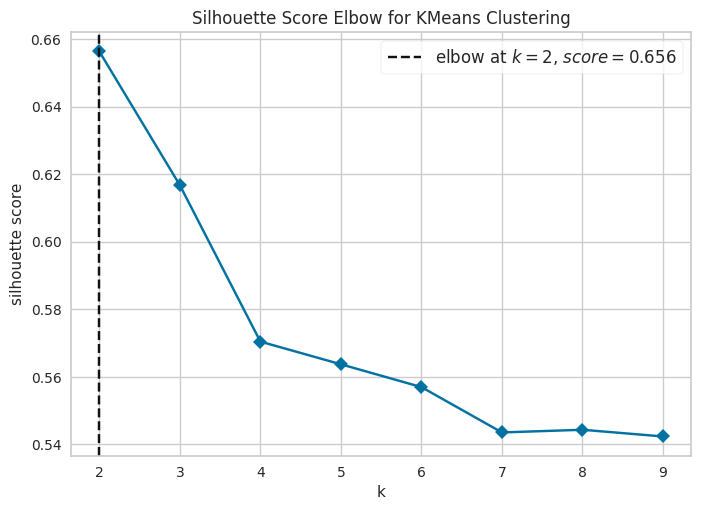

Optimal number of clusters based on WCSS: 2


                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=206327;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=158815;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

,Period,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,Risk Level
0,2017 JAN - 2017 DEC,0.0,69.0,12.0,32.0,56.0,30.0,90.0,90.0,0,0.0,0,0,1,0,0,1
1,2017 APR - 2017 OCT,0.0,53.0,15.0,53.0,32.0,1.0,80.0,80.0,0,0.0,0,1,1,0,0,2
2,2017 MAY - 2017 OCT,0.0,59.0,16.0,47.0,37.0,1.0,110.0,110.0,0,0.0,0,1,1,0,0,2
3,2017 MAY - 2017 OCT,0.0,33.0,71.0,17.0,12.0,60.0,NaN,90.0,0,0.0,0,1,1,0,0,1
4,2017 MAY - 2017 OCT,0.0,102.0,21.0,28.0,52.0,90.0,NaN,106.0,0,0.0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,2023 JAN - 2023 JUN,1.0,35.0,47.0,37.0,16.0,0.0,90.0,90.0,0,0.0,0,0,1,0,0,2
4842,2023 JAN - 2023 JUN,1.0,91.0,7.0,20.0,73.0,90.0,NaN,120.0,0,0.0,0,1,1,0,0,1
4843,2023 JAN - 2023 JUN,1.0,102.0,5.0,21.0,74.0,60.0,NaN,180.0,0,0.0,0,1,1,0,0,1
4844,2023 JAN - 2023 JUN,1.0,75.0,23.0,28.0,47.0,0.0,180.0,180.0,0,0.0,0,1,1,0,0,1


In [15]:
perform_kmeans_clustering(data, column_to_cluster)

In [16]:
# Class imbalance
risk_level_distribution = data['Risk Level'].value_counts()
print(risk_level_distribution)

Risk Level
1    3566
2    1280
Name: count, dtype: int64
